In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics
import statsmodels.api as sm

In [31]:
data = pd.read_csv('Eth_Bit.csv')
data.head()

,Date,EthOpen,EthHigh,EthLow,EthClose,EthAdjClose,EthVolume,BitOpen,BitHigh,BitLow,BitClose,BitAdjClose,BitVolume
0,10/11/17,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5.208250e+09
1,11/11/17,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4.908680e+09
2,12/11/17,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8.957350e+09
3,13/11/17,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6.263250e+09
4,14/11/17,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09


In [32]:
# Calculate Ethereum price
data['EthPrice'] = (data['EthHigh'] + data['EthLow']) / 2

# Calculate Bitcoin price
data['BitPrice'] = (data['BitHigh'] + data['BitLow']) / 2

# Create a new DataFrame with just the Date, Ethereum price, and Bitcoin price
eth_bit_prices = data[['Date', 'EthPrice', 'BitPrice']].copy()

# Display the new DataFrame
print(eth_bit_prices)


          Date     EthPrice      BitPrice
0     10/11/17   309.629989   6874.435059
1     11/11/17   308.822495   6538.685059
2     12/11/17   308.833008   6072.029785
3     13/11/17   317.720001   6327.739990
4     14/11/17   328.470001   6613.364990
...        ...          ...           ...
2259   17/1/24  2550.584961  42689.599610
2260   18/1/24  2486.199707  41753.759770
2261   19/1/24  2458.008057  41215.808595
2262   20/1/24          NaN           NaN
2263   21/1/24  2466.985230  41654.150395

[2264 rows x 3 columns]


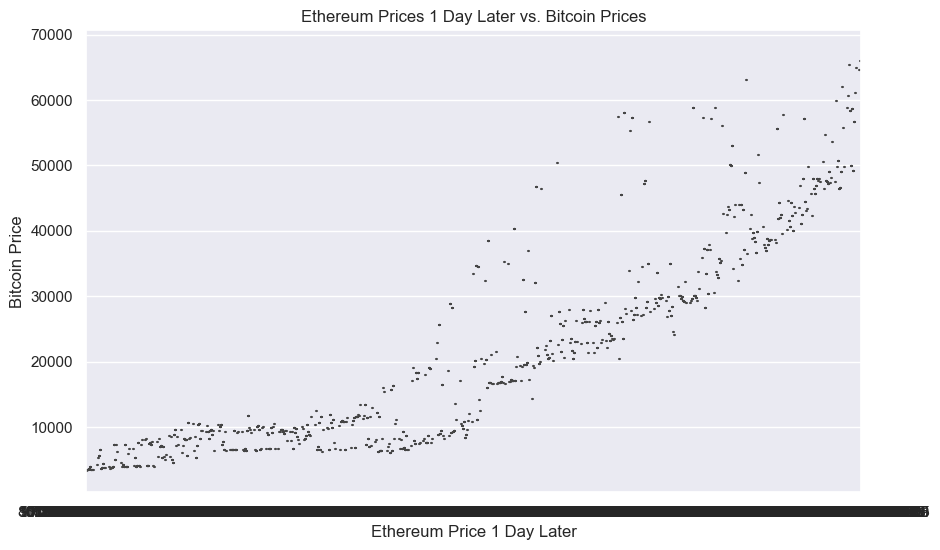

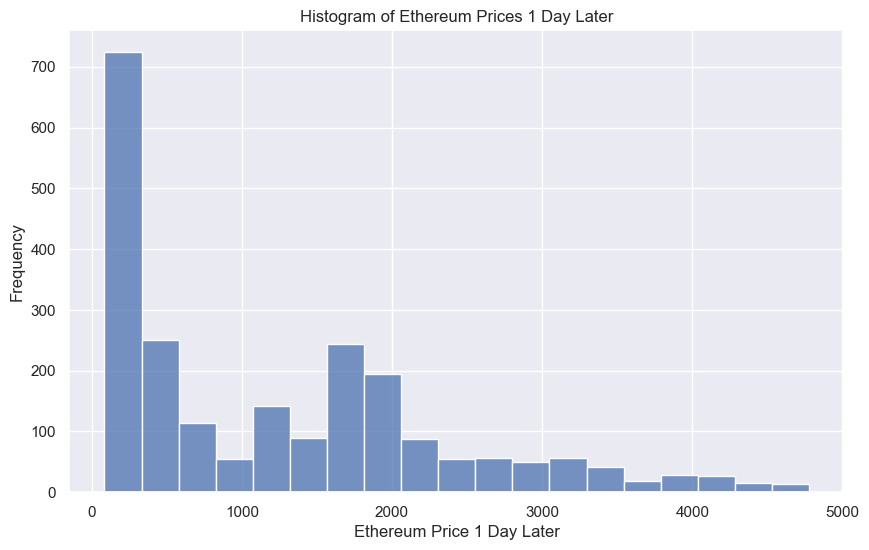

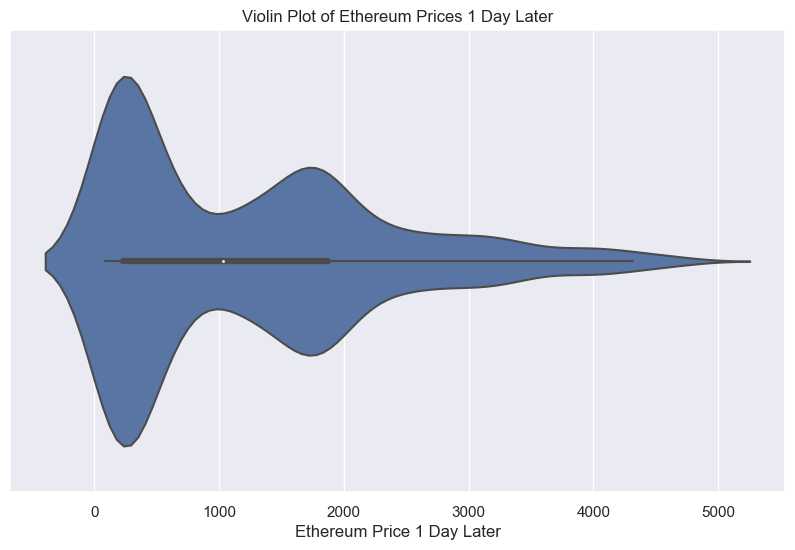

In [33]:
# Shift Ethereum prices by one day to align with Bitcoin prices
eth_bit_prices['EthPriceNextDay'] = eth_bit_prices['EthPrice'].shift(-1)

# Drop the last row to handle NaN values created by shifting
eth_bit_prices.dropna(inplace=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=eth_bit_prices['EthPriceNextDay'], y=eth_bit_prices['BitPrice'])
plt.title('Ethereum Prices 1 Day Later vs. Bitcoin Prices')
plt.xlabel('Ethereum Price 1 Day Later')
plt.ylabel('Bitcoin Price')
plt.show()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(x=eth_bit_prices['EthPriceNextDay'])
plt.title('Histogram of Ethereum Prices 1 Day Later')
plt.xlabel('Ethereum Price 1 Day Later')
plt.ylabel('Frequency')
plt.show()

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=eth_bit_prices['EthPriceNextDay'])
plt.title('Violin Plot of Ethereum Prices 1 Day Later')
plt.xlabel('Ethereum Price 1 Day Later')
plt.show()

<Figure size 1000x800 with 0 Axes>

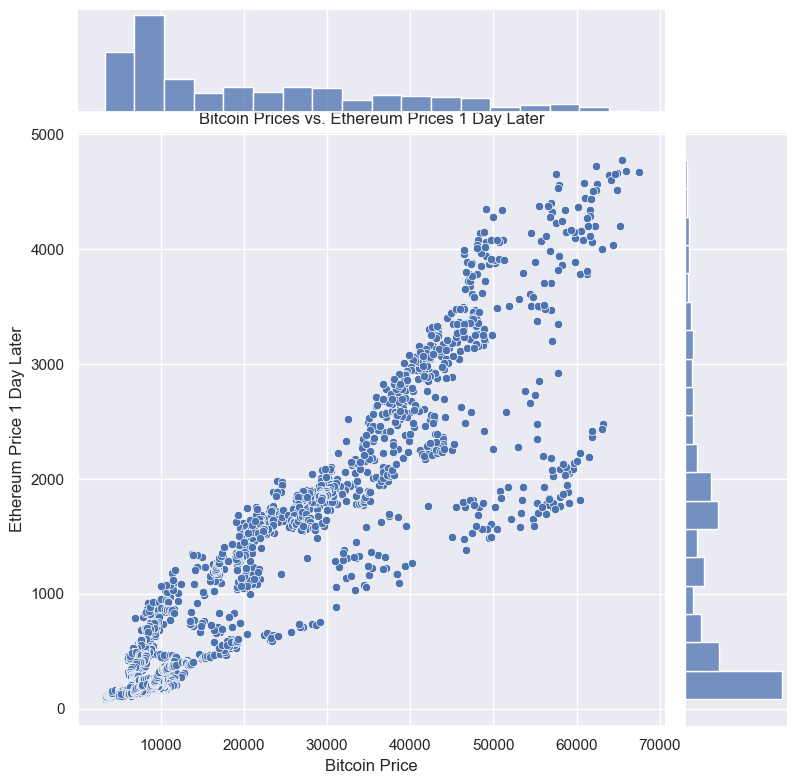

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a joint plot
sns.jointplot(data=eth_bit_prices, x='BitPrice', y='EthPriceNextDay', height=8, kind='scatter')

# Add title and axis labels
plt.title('Bitcoin Prices vs. Ethereum Prices 1 Day Later')
plt.xlabel('Bitcoin Price')
plt.ylabel('Ethereum Price 1 Day Later')

# Show the plot
plt.show()


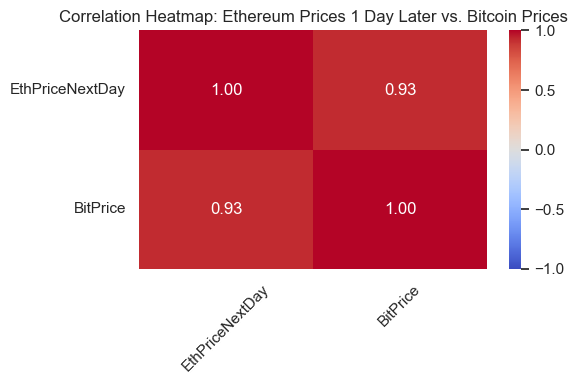

In [28]:
# Select only the 'EthPriceNextDay' and 'BitPrice' columns
selected_columns = eth_bit_prices[['EthPriceNextDay', 'BitPrice']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')

# Add title and adjust plot settings
plt.title('Correlation Heatmap: Ethereum Prices 1 Day Later vs. Bitcoin Prices')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
# Select the desired columns
volume_data = data[['Date', 'BitVolume', 'EthVolume']].copy()

# Convert columns to numeric if they contain non-numeric values
volume_data.loc[:, 'BitVolume'] = pd.to_numeric(selected_columns['BitVolume'], errors='coerce')
volume_data.loc[:, 'EthVolume'] = pd.to_numeric(selected_columns['EthVolume'], errors='coerce')

# Drop rows with non-numeric values
volume_data.dropna(inplace=True)

# Reset index
volume_data.reset_index(drop=True, inplace=True)

# Display the resulting dataset
print(volume_data)


          Date     BitVolume     EthVolume
0     11/11/17  8.957350e+09  1.613480e+09
1     12/11/17  6.263250e+09  1.041890e+09
2     13/11/17  3.197110e+09  1.069680e+09
3     14/11/17  4.200880e+09  7.226660e+08
4     15/11/17  5.123810e+09  7.972540e+08
...        ...           ...           ...
2255   14/1/24  2.232022e+10  9.700630e+09
2256   15/1/24  2.406287e+10  1.106332e+10
2257   16/1/24  2.085123e+10  1.044102e+10
2258   17/1/24  2.521836e+10  1.190003e+10
2259   18/1/24  2.575241e+10  1.140528e+10

[2260 rows x 3 columns]


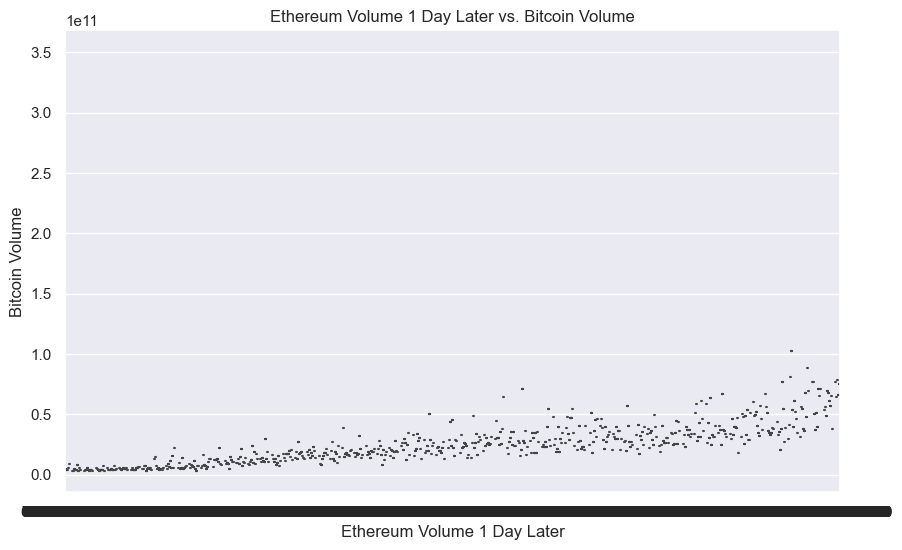

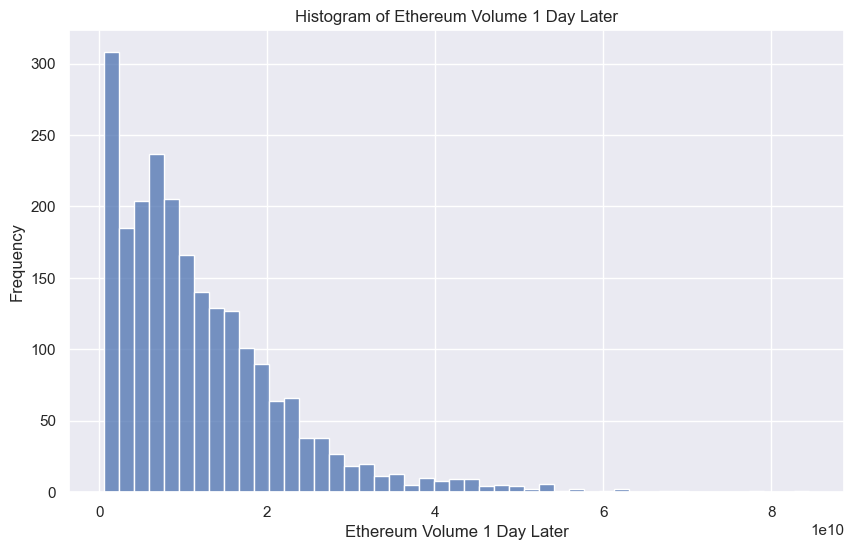

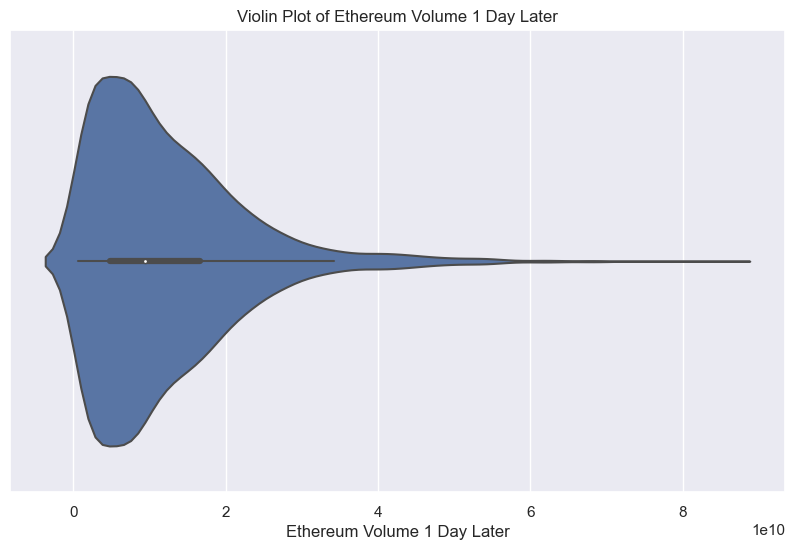

In [46]:
# Shift Ethereum volume by one day to align with Bitcoin volume
volume_data['EthVolumeNextDay'] = volume_data['EthVolume'].shift(-1)

# Drop the last row to handle NaN values created by shifting
volume_data.dropna(inplace=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=volume_data['EthVolumeNextDay'], y=volume_data['BitVolume'])
plt.title('Ethereum Volume 1 Day Later vs. Bitcoin Volume')
plt.xlabel('Ethereum Volume 1 Day Later')
plt.ylabel('Bitcoin Volume')
plt.show()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(x=volume_data['EthVolumeNextDay'])
plt.title('Histogram of Ethereum Volume 1 Day Later')
plt.xlabel('Ethereum Volume 1 Day Later')
plt.ylabel('Frequency')
plt.show()

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=volume_data['EthVolumeNextDay'])
plt.title('Violin Plot of Ethereum Volume 1 Day Later')
plt.xlabel('Ethereum Volume 1 Day Later')
plt.show()


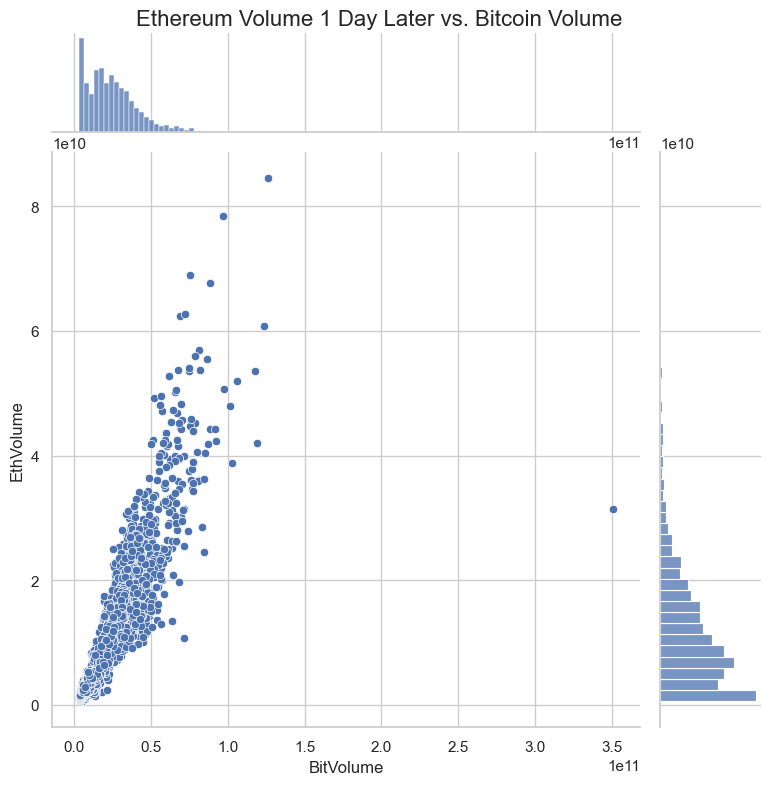

In [48]:
# Set up the seaborn style
sns.set(style="whitegrid")

# Create a joint plot
sns.jointplot(data=volume_data, x='BitVolume', y='EthVolume', height=8, kind='scatter')

# Add title and axis labels
plt.subplots_adjust(top=0.95)
plt.suptitle('Ethereum Volume 1 Day Later vs. Bitcoin Volume', fontsize=16)

# Show the plot
plt.show()



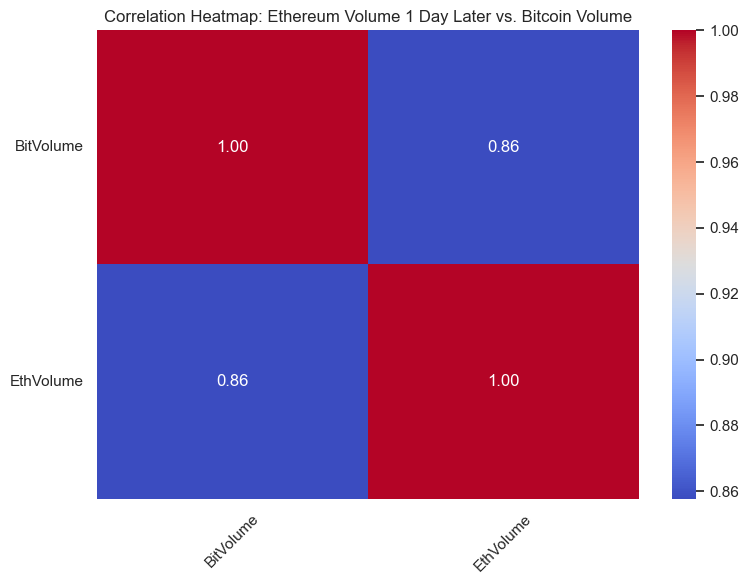

In [49]:
# Calculate the correlation matrix
correlation_matrix = volume_data[['BitVolume', 'EthVolume']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and adjust plot settings
plt.title('Correlation Heatmap: Ethereum Volume 1 Day Later vs. Bitcoin Volume')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### There is a high correlation coefficient between Ethereum prices and Bitcoin prices which suggests a strong linear relationship between the two. In this case, the correlation coefficient close to 1 (0.93 for prices and 0.86 for the volume) which indicates a positive correlation, meaning that as Bitcoin prices increase (or decrease), Ethereum prices tend to increase (or decrease) as well.